In [1]:
import matplotlib.pyplot as plt
import numpy as np

Text(0,0.5,'|Y(freq)|')

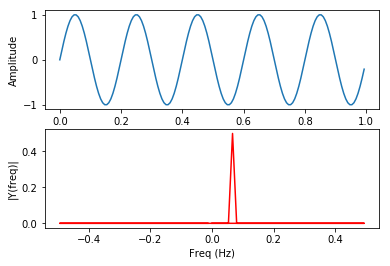

In [7]:

Fs = 150.0;  # sampling rate
Ts = 1.0/Fs; # sampling interval
t = np.arange(0,1,Ts) # time vector

ff = 5;   # frequency of the signal
y = np.sin(2*np.pi*ff*t)

n = len(y) # length of the signal
k = np.arange(n)
T = n/Fs


Y = np.fft.fft(y)/n # fft computing and normalization
Y = Y[range(int(n/2))]

frq = np.fft.fftfreq(len(Y))

fig, ax = plt.subplots(2, 1)
ax[0].plot(t,y)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Amplitude')
ax[1].plot(frq,abs(Y),'r') # plotting the spectrum
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y(freq)|')

Text(0,0.5,'|Y(freq)|')

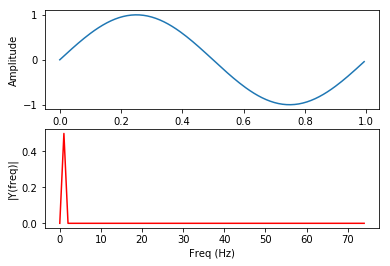

In [8]:

Fs = 150.0;  # sampling rate
Ts = 1.0/Fs; # sampling interval
t = np.arange(0,1,Ts) # time vector

ff = 1;   # frequency of the signal
y = np.sin(2*np.pi*ff*t)

n = len(y) # length of the signal
k = np.arange(n)
T = n/Fs
frq = k/T # two sides frequency range
frq = frq[range(int(n/2))] # one side frequency range

Y = np.fft.fft(y)/n # fft computing and normalization
Y = Y[range(int(n/2))]

fig, ax = plt.subplots(2, 1)
ax[0].plot(t,y)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Amplitude')
ax[1].plot(frq,abs(Y),'r') # plotting the spectrum
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y(freq)|')

In [9]:
import math
import wave
import struct


freq = 440.0
data_size = 40000
fname = "test.wav"
frate = 11025.0
amp = 64000.0
nchannels = 1
sampwidth = 2
framerate = int(frate)
nframes = data_size
comptype = "NONE"
compname = "not compressed"
data = [math.sin(2 * math.pi * freq * (x / frate))
        for x in range(data_size)]
wav_file = wave.open(fname, 'w')
wav_file.setparams(
    (nchannels, sampwidth, framerate, nframes, comptype, compname))
for v in data:
    wav_file.writeframes(struct.pack('h', int(v * amp / 2)))
wav_file.close()

In [10]:
import numpy as np

-0.5 0.499975
439.89750000000004


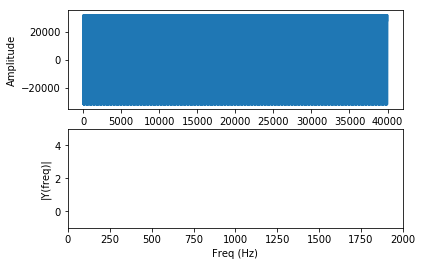

In [31]:
data_size = 40000
fname = "test.wav"
frate = 11025.0
wav_file = wave.open(fname, 'r')
data = wav_file.readframes(data_size)
wav_file.close()
data = struct.unpack('{n}h'.format(n=data_size), data)
data = np.array(data)

w = np.fft.fft(data)
freqs = np.fft.fftfreq(len(w))

fig, ax = plt.subplots(2, 1)
ax[0].plot(data)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Amplitude')
ax[1].plot(freqs* frate,abs(w),'r') # plotting the spectrum
ax[1].axis([0,2000,-1,5])
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y(freq)|')

print(freqs.min(), freqs.max())
# (-0.5, 0.499975)

# Find the peak in the coefficients
idx = np.argmax(np.abs(w))
freq = freqs[idx]
freq_in_hertz = abs(freq * frate)
print(freq_in_hertz)
# 439.8975